In [1]:
!pip install gdown

In [2]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 147.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
   

In [3]:
import gdown
import zipfile
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

from PIL import Image
from shutil import copy2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
# from google.colab import files, drive
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Link Dataset Terbaru
# gdown.download(f'https://drive.google.com/uc?id=1Jh8EumXOilphcp2wb1GT3ReFl37WJ2uW', '/content/', quiet=False)

# Link Dataset Paling Terbaru
gdown.download(f'https://drive.google.com/uc?id=1EHf8O8JRtoBUDkcyGB0Lt5MlwPWwM2yb', '/content/', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1EHf8O8JRtoBUDkcyGB0Lt5MlwPWwM2yb
From (redirected): https://drive.google.com/uc?id=1EHf8O8JRtoBUDkcyGB0Lt5MlwPWwM2yb&confirm=t&uuid=d73fdcc0-11b0-485c-9e01-44e2ab9bcd75
To: /content/New_Motif_Batik_Dataset.zip
100%|██████████| 381M/381M [00:02<00:00, 165MB/s]


'/content/New_Motif_Batik_Dataset.zip'

In [5]:
# Extract the dataset
zip_ref = zipfile.ZipFile('/content/New_Motif_Batik_Dataset.zip', 'r')
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

In [6]:
# Define Directories for Dataset
base_dir = '/tmp/dataset/New_Motif_Batik_Dataset'

train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

# Create directories for train, val, and test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get all class names (folder names)
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Create class directories in train, val, and test folders
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

In [8]:
# Split data
for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    images = os.listdir(cls_dir)
    images = [img for img in images if os.path.isfile(os.path.join(cls_dir, img))]

    train_imgs, temp_imgs = train_test_split(images, test_size=0.15, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.33, random_state=42)

    for img in train_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(train_dir, cls))
    for img in val_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(val_dir, cls))
    for img in test_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(test_dir, cls))

In [9]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

testing_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)

testing_generator = testing_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
)

Found 4274 images belonging to 15 classes.
Found 504 images belonging to 15 classes.
Found 259 images belonging to 15 classes.


In [10]:
# Menggunakan Transfer Learning
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# base_model.summary()

In [11]:
model = tf.keras.Sequential([
            base_model,
            # This is the first convolution
            tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # This is the second convolution
            tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # tf.keras.layers.Flatten(),
            tf.keras.layers.GlobalAveragePooling2D(),
            # tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(15, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Tanpa Transfer Learning
# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5), #diperbesar
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(15, activation='softmax')
# ])

# # kalo nambah dropout = memperkecil akurasi -> balikin dropout, tambah conv layer

# # Print the model summary
# model.summary()

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check the loss
    if(logs.get('accuracy') > 0.91 and logs.get('val_accuracy') > 0.91):

      # Stop if threshold is met
      print("\nAccuracy is above 0.91 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [14]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1, callbacks=[early_stopping])

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


134/134 ━━━━━━━━━━━━━━━━━━━━ 122s 739ms/step - accuracy: 0.1290 - loss: 2.6431 - val_accuracy: 0.3294 - val_loss: 2.0957
Epoch 2/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 97s 535ms/step - accuracy: 0.3650 - loss: 1.9922 - val_accuracy: 0.5159 - val_loss: 1.4900
Epoch 3/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 78s 555ms/step - accuracy: 0.4718 - loss: 1.6219 - val_accuracy: 0.5337 - val_loss: 1.3321
Epoch 4/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 82s 559ms/step - accuracy: 0.5452 - loss: 1.3825 - val_accuracy: 0.5734 - val_loss: 1.2327
Epoch 5/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 80s 544ms/step - accuracy: 0.5804 - loss: 1.2765 - val_accuracy: 0.6052 - val_loss: 1.1740
Epoch 6/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 85s 564ms/step - accuracy: 0.6240 - loss: 1.1665 - val_accuracy: 0.6667 - val_loss: 1.0588
Epoch 7/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 80s 546ms/step - accuracy: 0.6442 - loss: 1.0805 - val_accuracy: 0.6786 - val_loss: 0.9895
Epoch 8/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 76s 540ms/step - accuracy: 0.6674 - loss: 0.9828 - va

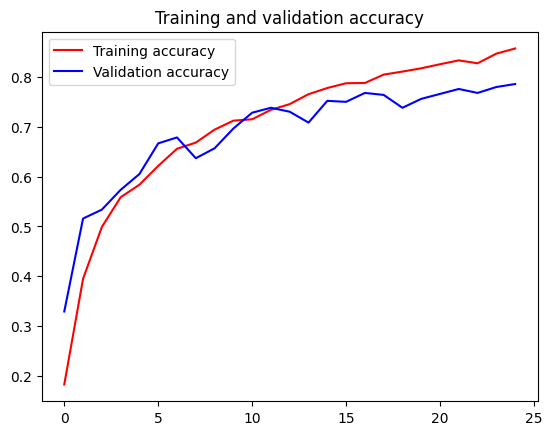

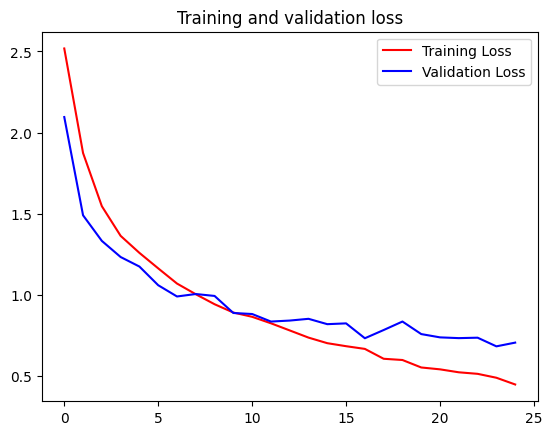

In [16]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
motives_dict = train_generator.class_indices
print(motives_dict)

{'Batik Bali': 0, 'Batik Betawi': 1, 'Batik Celup': 2, 'Batik Cendrawasih': 3, 'Batik Dayak': 4, 'Batik Geblek Renteng': 5, 'Batik Insang': 6, 'Batik Kawung': 7, 'Batik Lasem': 8, 'Batik Mega Mendung': 9, 'Batik Pala': 10, 'Batik Parang': 11, 'Batik Poleng': 12, 'Batik Sekar Jagad': 13, 'Batik Tambal': 14}


In [22]:
true_labels = []
pred_labels = []

for motive in motives_dict.keys():
    images_list = os.listdir(os.path.join(test_dir, motive))
#     plt.figure(figsize=(16, 20))

    correct_count = 0
    total_images = len(images_list)

    for idx, image in enumerate(images_list):
        img_path = f'data/test/{motive}/{image}'
        img = load_img(img_path, target_size=(224, 224))

        img_array = img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        motives_list = list(motives_dict.keys())
        prediction = model(img_array)
        pred_idx = np.argmax(prediction)
        pred_motive = motives_list[pred_idx]
        pred_confidence = prediction[0][pred_idx] * 100

        true_labels.append(motive)
        pred_labels.append(pred_motive)

        if pred_motive == motive:
            correct_count += 1

    print(f'{motive} Predictions --> {correct_count}/{total_images} correct')

#         plt.subplot(5, 4, idx+1)
#         plt.title(f'Actual: {motive}\nPrediction: {pred_motive} {pred_confidence:.2f}%')
#         plt.imshow(img)
#         plt.axis('off')
# plt.show()

Batik Bali Predictions --> 11/17 correct
Batik Betawi Predictions --> 8/18 correct
Batik Celup Predictions --> 11/19 correct
Batik Cendrawasih Predictions --> 5/17 correct
Batik Dayak Predictions --> 7/17 correct
Batik Geblek Renteng Predictions --> 5/17 correct
Batik Insang Predictions --> 5/17 correct
Batik Kawung Predictions --> 11/17 correct
Batik Lasem Predictions --> 6/18 correct
Batik Mega Mendung Predictions --> 16/18 correct
Batik Pala Predictions --> 6/17 correct
Batik Parang Predictions --> 6/17 correct
Batik Poleng Predictions --> 10/16 correct
Batik Sekar Jagad Predictions --> 11/17 correct
Batik Tambal Predictions --> 5/17 correct


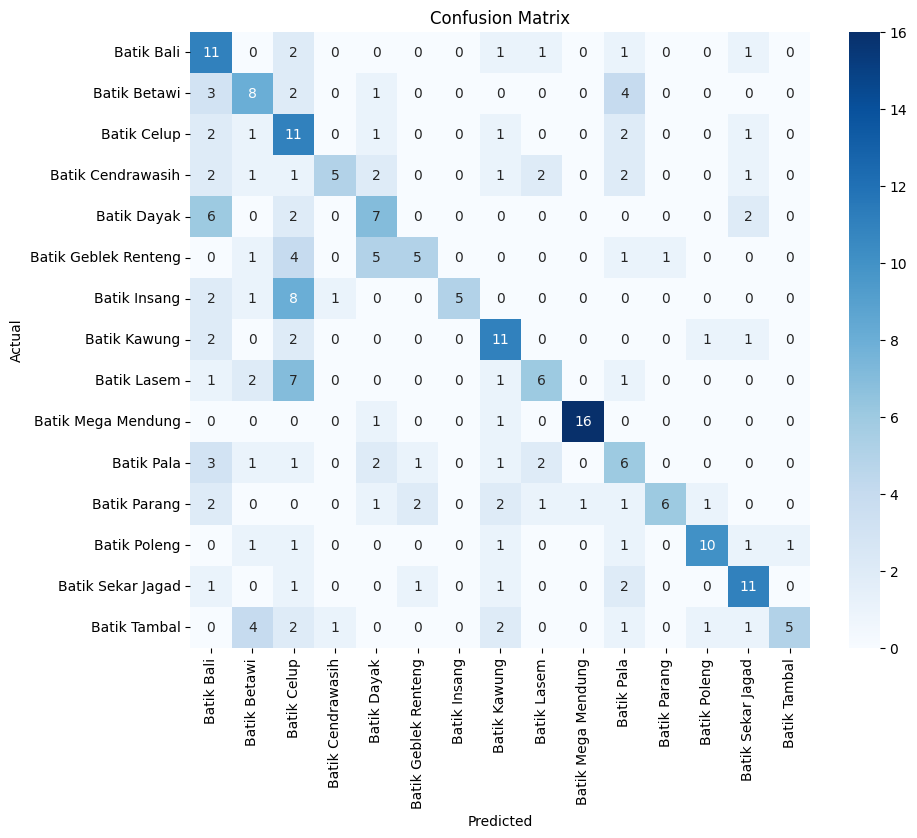

Weighted F1 Score: 0.48
Classification Report:
                      precision    recall  f1-score   support

          Batik Bali       0.31      0.65      0.42        17
        Batik Betawi       0.40      0.44      0.42        18
         Batik Celup       0.25      0.58      0.35        19
   Batik Cendrawasih       0.71      0.29      0.42        17
         Batik Dayak       0.35      0.41      0.38        17
Batik Geblek Renteng       0.56      0.29      0.38        17
        Batik Insang       1.00      0.29      0.45        17
        Batik Kawung       0.48      0.65      0.55        17
         Batik Lasem       0.50      0.33      0.40        18
  Batik Mega Mendung       0.94      0.89      0.91        18
          Batik Pala       0.27      0.35      0.31        17
        Batik Parang       0.86      0.35      0.50        17
        Batik Poleng       0.77      0.62      0.69        16
   Batik Sekar Jagad       0.58      0.65      0.61        17
        Batik Tambal  

In [23]:
# Convert true labels and predicted labels to indices
true_indices = [motives_dict[label] for label in true_labels]
pred_indices = [motives_dict[label] for label in pred_labels]

# Compute confusion matrix
conf_matrix = confusion_matrix(true_indices, pred_indices)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=motives_list, yticklabels=motives_list, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute F1 score
f1 = f1_score(true_indices, pred_indices, average='weighted')
print(f'Weighted F1 Score: {f1:.2f}')

# Print classification report
class_report = classification_report(true_indices, pred_indices, target_names=motives_list)
print('Classification Report:')
print(class_report)

In [ ]:
# SavedModel
saved_model_path = "./my_model.h5"
model.save(saved_model_path)

In [ ]:
# Tensorflow.js
!tensorflowjs_converter --input_format=keras {saved_model_path} ./
!zip filebin.zip *.bin model.json

In [ ]:
# Convert the model with Tensorflow Lite
BATIK_SAVED_MODEL = "batik_saved_model"
tf.saved_model.save(model, BATIK_SAVED_MODEL)

In [ ]:
%%bash -s $BATIK_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

In [ ]:
loaded = tf.saved_model.load(BATIK_SAVED_MODEL)
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

In [ ]:
# converter = tf.lite.TFLiteConverter.from_saved_model("batik_saved_model")
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_model = converter.convert()

# tflite_model_file = 'converted_model.tflite'

# with open(tflite_model_file, "wb") as f:
#     f.write(tflite_model)

In [ ]:
# Melihat hasil predict pada data testing
# # Mendapatkan nama kelas dari generator
# class_indices = train_generator.class_indices
# # Membalikkan dictionary untuk mendapatkan nama kelas dari indeks
# labels = {v: k for k, v in class_indices.items()}

# # Mengambil label asli dari testing_generator
# true_classes = testing_generator.classes
# # Mendapatkan nama kelas dari label asli
# true_labels = [labels[i] for i in true_classes]

# # Mendapatkan nama file dari testing_generator
# filenames = testing_generator.filenames

# for i, pred in enumerate(predictions):
#     # Membulatkan nilai probabilitas menjadi 3 angka di belakang koma
#     rounded_classes = np.round(pred, 3)

#     # Mendapatkan indeks kelas dengan prediksi tertinggi
#     predicted_class_index = np.argmax(pred)
#     predicted_class_label = labels[predicted_class_index]

#     # Mendapatkan label asli dari indeks
#     true_label = true_labels[i]

#     print(f"File: {filenames[i]}")
#     print(f"True class: {true_label}")
#     print(f"Predicted class: {predicted_class_label} (index: {predicted_class_index})")
#     print(f"Prediction probabilities: {rounded_classes}")
#     print()